# Test code for LEMON & MNE
This notebook is a sheet for learning and testing samples of basic MNE operations with MNE

In [84]:
import mne
import glob
import tarfile
import matplotlib.pyplot as plt
import numpy as np
import shutil

from mne_connectivity import spectral_connectivity_epochs
from mne.datasets import sample

In [ ]:
# *** Unnecessary start ***

folderPath = sorted(glob.glob("../../experiments/Lemon_PreprocessedRaw/*.tar.gz"))
# Unzip tar.gz file
for i in folderPath:
    ZipFile = tarfile.open(i)
    ZipFile.extractall('../../experiments/Lemon_PreEEGLAB/'+i.split('/')[-1].split('.')[0]+'/')
    ZipFile.close()

In [49]:
# Read .set file

prepSignal_EC = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_Preprocessed/sub-032301/sub-032301/sub-032301_EC.set', preload=True)
prepSignal_EO = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_Preprocessed/sub-032301/sub-032301/sub-032301_EO.set', preload=True)
rawSignal = mne.io.read_raw_brainvision('/workspace/brail_poc3/experiments/LemonTest_Raw/sub-032301/RSEEG/sub-032301.vhdr', preload=True)

Reading /workspace/brail_poc3/experiments/Lemon_Preprocessed/sub-032301/sub-032301/sub-032301_EC.fdt
Reading 0 ... 119344  =      0.000 ...   477.376 secs...
Reading /workspace/brail_poc3/experiments/Lemon_Preprocessed/sub-032301/sub-032301/sub-032301_EO.fdt
Reading 0 ... 117860  =      0.000 ...   471.440 secs...


/tmp/ipykernel_42783/3334175956.py:3: RuntimeWarning: Data file name in EEG.data (sub-010002_EC.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032301_EC.fdt).
  prepSignal_EC = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_Preprocessed/sub-032301/sub-032301/sub-032301_EC.set', preload=True)
/tmp/ipykernel_42783/3334175956.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  prepSignal_EC = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_Preprocessed/sub-032301/sub-032301/sub-032301_EC.set', preload=True)
/tmp/ipykernel_42783/3334175956.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  prepSignal_EC = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_Preprocessed/sub-032301/sub-032301/sub-032301_EC.set', preload=True)
/tmp/ipykernel_42783/3334175956.py:4:

Extracting parameters from /workspace/brail_poc3/experiments/LemonTest_Raw/sub-032301/RSEEG/sub-032301.vhdr...
Setting channel info structure...
Reading 0 ... 2554999  =      0.000 ...  1022.000 secs...


/tmp/ipykernel_42783/3334175956.py:4: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  prepSignal_EO = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_Preprocessed/sub-032301/sub-032301/sub-032301_EO.set', preload=True)
/tmp/ipykernel_42783/3334175956.py:4: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  prepSignal_EO = mne.io.read_raw_eeglab('/workspace/brail_poc3/experiments/Lemon_Preprocessed/sub-032301/sub-032301/sub-032301_EO.set', preload=True)


In [5]:
print(rawSignal.info)

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 62 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2013-11-11 13:47:40 UTC
 nchan: 62
 projs: []
 sfreq: 2500.0 Hz
>


Effective window size : 8.192 (s)


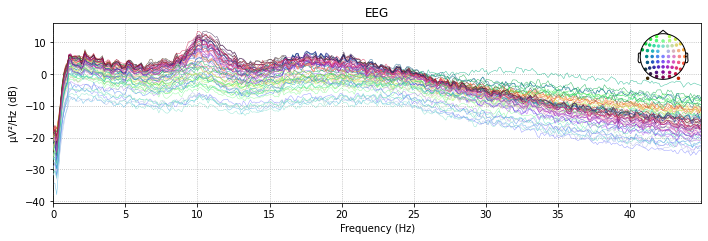

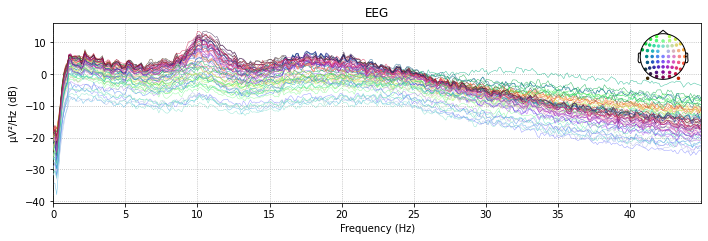

In [8]:
prepSignal_EC.compute_psd(fmax=45).plot(picks="data", exclude="bads")

In [9]:
for i, j in enumerate(rawSignal.get_data()):
    print(i, len(j))

0 2555000
1 2555000
2 2555000
3 2555000
4 2555000
5 2555000
6 2555000
7 2555000
8 2555000
9 2555000
10 2555000
11 2555000
12 2555000
13 2555000
14 2555000
15 2555000
16 2555000
17 2555000
18 2555000
19 2555000
20 2555000
21 2555000
22 2555000
23 2555000
24 2555000
25 2555000
26 2555000
27 2555000
28 2555000
29 2555000
30 2555000
31 2555000
32 2555000
33 2555000
34 2555000
35 2555000
36 2555000
37 2555000
38 2555000
39 2555000
40 2555000
41 2555000
42 2555000
43 2555000
44 2555000
45 2555000
46 2555000
47 2555000
48 2555000
49 2555000
50 2555000
51 2555000
52 2555000
53 2555000
54 2555000
55 2555000
56 2555000
57 2555000
58 2555000
59 2555000
60 2555000
61 2555000


In [109]:
rawSignal.get_data()[1]

array([-2.46e-05, -2.62e-05, -2.52e-05, ...,  4.00e-07,  3.60e-06,
       -1.00e-07])

In [101]:
rawSignal.info.ch_names

['Fp1',
 'Fp2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'VEOG',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'AFz',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'PO9',
 'O1',
 'Oz',
 'O2',
 'PO10',
 'AF7',
 'AF3',
 'AF4',
 'AF8',
 'F5',
 'F1',
 'F2',
 'F6',
 'FT7',
 'FC3',
 'FC4',
 'FT8',
 'C5',
 'C1',
 'C2',
 'C6',
 'TP7',
 'CP3',
 'CPz',
 'CP4',
 'TP8',
 'P5',
 'P1',
 'P2',
 'P6',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8']

RuntimeError: No digitization points found.

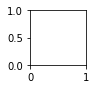

In [83]:
# Wrong code
mne.viz.plot_topomap(rawSignal.get_data().T[1], rawSignal.info)

Using matplotlib as 2D backend.


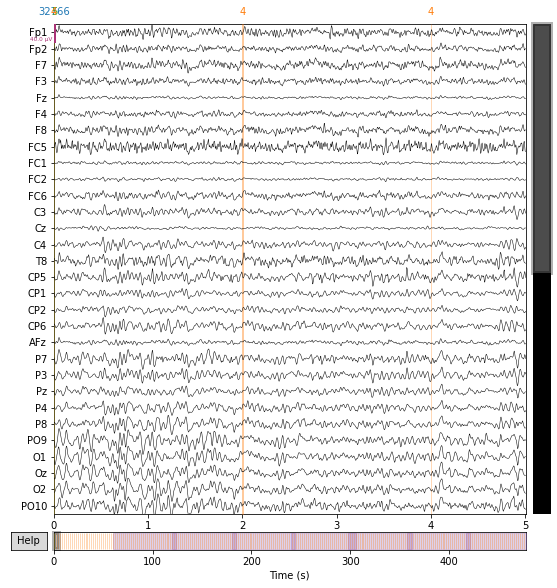

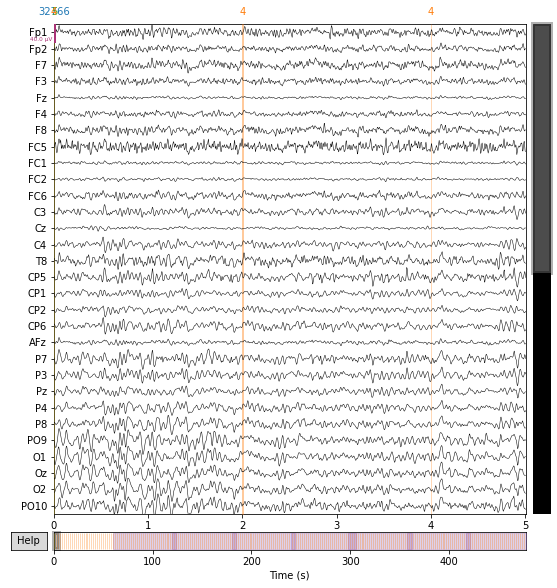

In [11]:
raw.plot(duration=5, n_channels=30)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, C3, Cz, C4, ...
 chs: 59 EEG
 custom_ref_applied: False
 dig: 62 items (3 Cardinal, 59 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 250.0 Hz
>


Text(0.5, 1.0, 'Sample channels')

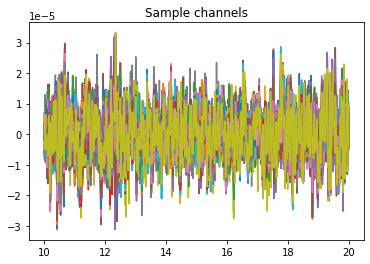

In [26]:
# Example: get 10s to 20s signal of eeg

print(raw.info)
picks = mne.pick_types(raw.info, eeg=True)
t_idx = raw.time_as_index([10., 20.])
data, times = raw[picks, t_idx[0]:t_idx[1]]
plt.plot(times,data.T)
plt.title("Sample channels")

In [49]:
# Get time info
print(min(raw.times))
print(max(raw.times))

0.0
477.376


In [21]:
data.shape

(59, 2500)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


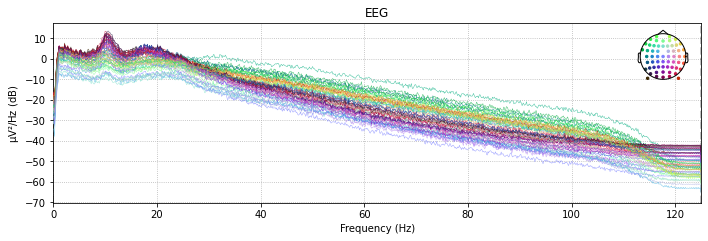

In [84]:
prepSignal.plot_psd()
plt.show()

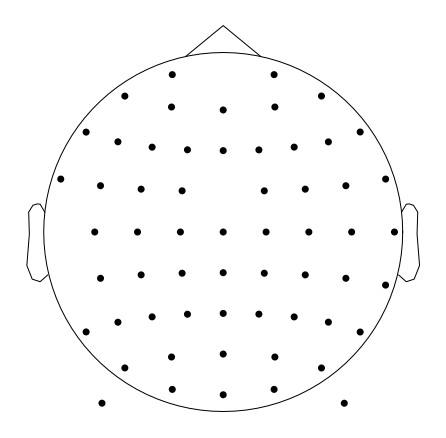

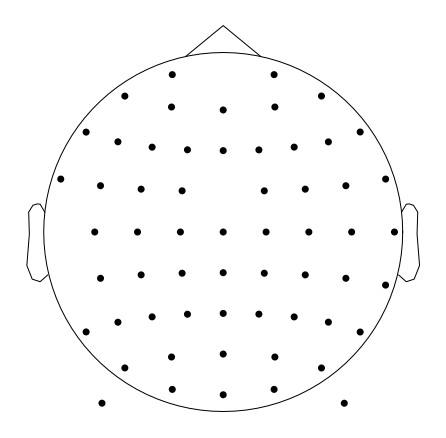

In [95]:
prepSignal.plot_sensors()

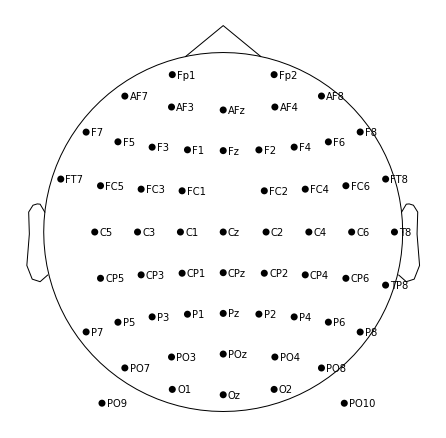

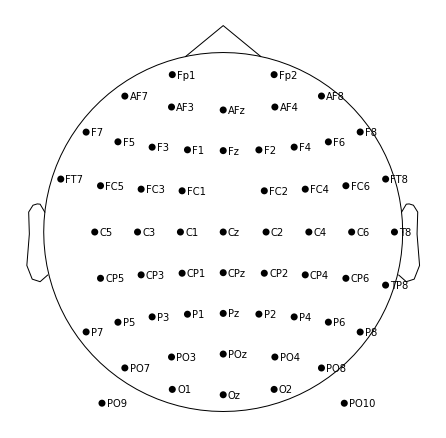

In [96]:
prepSignal.plot_sensors(show_names=True)

Effective window size : 8.192 (s)


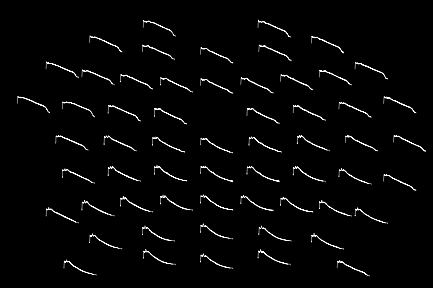

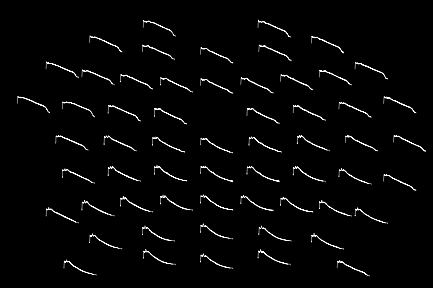

In [86]:
prepSignal.compute_psd().plot_topo()

In [113]:
rawSignal.get_data().shape

(62, 2555000)

In [163]:
print("Max time is", str(prepSignal_EC.times[-1])+"s.")

Max time is 477.376s.


In [148]:
Test_signal = prepSignal_EC.get_data()[0]
print("EC signal shape: ", prepSignal_EC.get_data().shape)
print("EC signal shape: ", prepSignal_EO.get_data().shape)

EC signal shape:  (59, 119345)
EC signal shape:  (59, 117861)


# Example of plot PLI

len(Test_signal) 119345


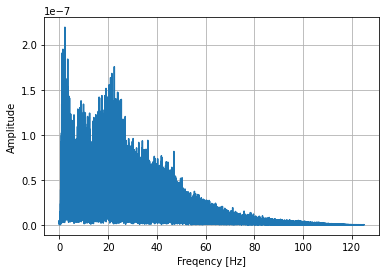

In [164]:
print("len(Test_signal)", len(Test_signal))
F = np.fft.fft(Test_signal) # 変換結果
N = len(Test_signal)
dt = 1 / 250 # 0.004s
freq = np.fft.fftfreq(N, d=dt) # 周波数

Amp = np.abs(F/(N/2)) # 振幅
fig, ax = plt.subplots()
ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])
# ax.plot(freq[1:1000], Amp[1:1000])
ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()

In [87]:
# Sample data making

fs = 250  # sampling rate (Hz)
n_e = 300  # number of epochs
T = 10  # length of epochs (s)
f = 10  # frequency of sinusoids (Hz)
t = np.arange(0, T, 1 / fs)
A = 1  # noise amplitude
sigma = 0.5  # Gaussian noise variance

data = []

phase_differences = [0, -np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
for ps in zip(phase_differences):
    sig = []
    for _ in range(n_e):
        sig.append(np.sin(2 * np.pi * f * t - ps) +
                   A * np.random.normal(0, sigma, size=t.shape))
    data.append(sig)

data = np.swapaxes(np.array(data), 0, 1)  # make epochs the first dimension

In [187]:
data.shape

(300, 6, 2500)

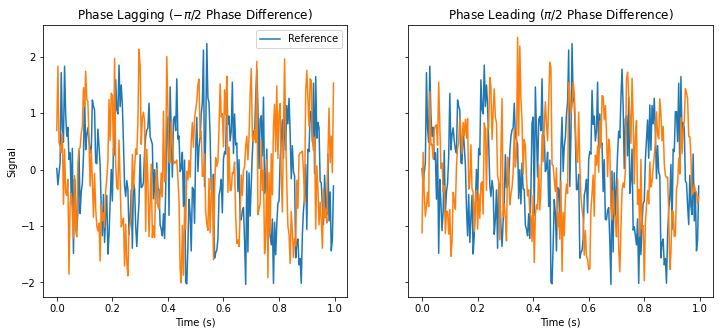

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax[0].plot(t[:fs], data[0, 0, :fs], label="Reference")
ax[0].plot(t[:fs], data[0, 2, :fs])

ax[0].set_title(r"Phase Lagging ($-\pi/2$ Phase Difference)")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Signal")
ax[0].legend()

ax[1].plot(t[:fs], data[0, 0, :fs], label="Reference")
ax[1].plot(t[:fs], data[0, 4, :fs])
ax[1].set_title(r"Phase Leading ($\pi/2$ Phase Difference)")
ax[1].set_xlabel("Time (s)")

#plt.show()

In [88]:
# Shape with epoches, channels, Points
data.shape 

(300, 6, 2500)

In [89]:
conn = []
indices = ([0, 0, 0, 0, 0], [1, 2, 3, 4, 5])
for method in ['pli', 'wpli', 'dpli']:
    conn.append(
        spectral_connectivity_epochs(
            data, method=method, sfreq=fs, indices=indices,
            fmin=9, fmax=11, faverage=True).get_data()[:, 0])
conn = np.array(conn)

Connectivity computation...
    computing connectivity for 5 connections
    using t=0.000s..9.996s for estimation (2500 points)
    frequencies: 9.0Hz..11.0Hz (21 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epoch 15
    computing connectivity for epoch 16
    computing connectivity for ep

    computing connectivity for epoch 196
    computing connectivity for epoch 197
    computing connectivity for epoch 198
    computing connectivity for epoch 199
    computing connectivity for epoch 200
    computing connectivity for epoch 201
    computing connectivity for epoch 202
    computing connectivity for epoch 203
    computing connectivity for epoch 204
    computing connectivity for epoch 205
    computing connectivity for epoch 206
    computing connectivity for epoch 207
    computing connectivity for epoch 208
    computing connectivity for epoch 209
    computing connectivity for epoch 210
    computing connectivity for epoch 211
    computing connectivity for epoch 212
    computing connectivity for epoch 213
    computing connectivity for epoch 214
    computing connectivity for epoch 215
    computing connectivity for epoch 216
    computing connectivity for epoch 217
    computing connectivity for epoch 218
    computing connectivity for epoch 219
    computing co

    computing connectivity for epoch 90
    computing connectivity for epoch 91
    computing connectivity for epoch 92
    computing connectivity for epoch 93
    computing connectivity for epoch 94
    computing connectivity for epoch 95
    computing connectivity for epoch 96
    computing connectivity for epoch 97
    computing connectivity for epoch 98
    computing connectivity for epoch 99
    computing connectivity for epoch 100
    computing connectivity for epoch 101
    computing connectivity for epoch 102
    computing connectivity for epoch 103
    computing connectivity for epoch 104
    computing connectivity for epoch 105
    computing connectivity for epoch 106
    computing connectivity for epoch 107
    computing connectivity for epoch 108
    computing connectivity for epoch 109
    computing connectivity for epoch 110
    computing connectivity for epoch 111
    computing connectivity for epoch 112
    computing connectivity for epoch 113
    computing connectivity

    computing connectivity for epoch 291
    computing connectivity for epoch 292
    computing connectivity for epoch 293
    computing connectivity for epoch 294
    computing connectivity for epoch 295
    computing connectivity for epoch 296
    computing connectivity for epoch 297
    computing connectivity for epoch 298
    computing connectivity for epoch 299
    computing connectivity for epoch 300
[Connectivity computation done]
Connectivity computation...
    computing connectivity for 5 connections
    using t=0.000s..9.996s for estimation (2500 points)
    frequencies: 9.0Hz..11.0Hz (21 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: DPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity

    computing connectivity for epoch 185
    computing connectivity for epoch 186
    computing connectivity for epoch 187
    computing connectivity for epoch 188
    computing connectivity for epoch 189
    computing connectivity for epoch 190
    computing connectivity for epoch 191
    computing connectivity for epoch 192
    computing connectivity for epoch 193
    computing connectivity for epoch 194
    computing connectivity for epoch 195
    computing connectivity for epoch 196
    computing connectivity for epoch 197
    computing connectivity for epoch 198
    computing connectivity for epoch 199
    computing connectivity for epoch 200
    computing connectivity for epoch 201
    computing connectivity for epoch 202
    computing connectivity for epoch 203
    computing connectivity for epoch 204
    computing connectivity for epoch 205
    computing connectivity for epoch 206
    computing connectivity for epoch 207
    computing connectivity for epoch 208
    computing co

In [90]:
conn

array([[0.06349206, 0.78539683, 0.03269841, 0.79777778, 0.07015873],
       [0.06001049, 0.85080737, 0.03756046, 0.86515011, 0.1064818 ],
       [0.51206349, 0.10730159, 0.49984127, 0.89888889, 0.53507937]])

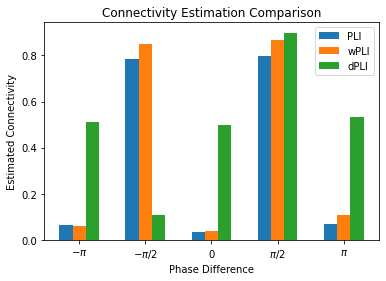

In [110]:
x = np.arange(5)

plt.figure()
plt.bar(x - 0.2, conn[0], 0.2, align='center', label="PLI")
plt.bar(x, conn[1], 0.2, align='center', label="wPLI")
plt.bar(x + 0.2, conn[2], 0.2, align='center', label="dPLI")

plt.title("Connectivity Estimation Comparison")
plt.xticks(x, (r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"))
plt.legend()
plt.xlabel("Phase Difference")
plt.ylabel("Estimated Connectivity")

plt.show()

# Plot PLI for LEMON

In [5]:
prepSignal_EC.get_data()[0]

array([ 3.40185380e-06, -1.15108478e-06, -3.05285215e-06, ...,
       -5.36247635e-06, -1.07306349e-06,  1.44466424e-06])

In [6]:
prepSignal_EC.get_data().shape

(59, 119345)

In [77]:
events_all = mne.make_fixed_length_events(prepSignal_EC, duration=2)
epochs_all = mne.Epochs(prepSignal_EC, events=events_all, event_id=None, tmin=0, tmax=2, baseline=None, preload=False)

Not setting metadata
238 matching events found
No baseline correction applied
0 projection items activated


In [8]:
len(indices[1])

NameError: name 'indices' is not defined

In [66]:
def CauConn(ChanNum, data, metrics = ['pli', 'wpli', 'dpli']):
    conn = []
    len_channel = data.get_data().shape[1]
    index1 = [ChanNum] * (len_channel-1)
    index2 = list(np.arange(0, len_channel, 1))
    del index2[ChanNum]
    indices = (index1, index2)
    print(indices)
    for method in metrics:
        conn.append(
            spectral_connectivity_epochs(
                data.get_data(), method=method, sfreq=250, indices=indices,
                fmin=9, fmax=11, faverage=True).get_data()[:, 0])
    conn = np.array(conn)
    return conn

In [69]:
Chan_PLI = []
for i in range(epochs.get_data().shape[1]):
    Chan_PLI.append(CauConn(i, epochs))

Using data from preloaded Raw for 238 events and 501 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 238 events and 501 original time points ...
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58])
Using data from preloaded Raw for 238 events and 501 original time points ...
Connectivity computation...
    computing connectivity for 58 connections
    using t=0.000s..2.000s for estimation (501 points)
    frequencies: 9.5Hz..11.0Hz (4 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLI
    comp

    computing connectivity for epoch 180
    computing connectivity for epoch 181
    computing connectivity for epoch 182
    computing connectivity for epoch 183
    computing connectivity for epoch 184
    computing connectivity for epoch 185
    computing connectivity for epoch 186
    computing connectivity for epoch 187
    computing connectivity for epoch 188
    computing connectivity for epoch 189
    computing connectivity for epoch 190
    computing connectivity for epoch 191
    computing connectivity for epoch 192
    computing connectivity for epoch 193
    computing connectivity for epoch 194
    computing connectivity for epoch 195
    computing connectivity for epoch 196
    computing connectivity for epoch 197
    computing connectivity for epoch 198
    computing connectivity for epoch 199
    computing connectivity for epoch 200
    computing connectivity for epoch 201
    computing connectivity for epoch 202
    computing connectivity for epoch 203
    computing co

    computing connectivity for epoch 134
    computing connectivity for epoch 135
    computing connectivity for epoch 136
    computing connectivity for epoch 137
    computing connectivity for epoch 138
    computing connectivity for epoch 139
    computing connectivity for epoch 140
    computing connectivity for epoch 141
    computing connectivity for epoch 142
    computing connectivity for epoch 143
    computing connectivity for epoch 144
    computing connectivity for epoch 145
    computing connectivity for epoch 146
    computing connectivity for epoch 147
    computing connectivity for epoch 148
    computing connectivity for epoch 149
    computing connectivity for epoch 150
    computing connectivity for epoch 151
    computing connectivity for epoch 152
    computing connectivity for epoch 153
    computing connectivity for epoch 154
    computing connectivity for epoch 155
    computing connectivity for epoch 156
    computing connectivity for epoch 157
    computing co

    computing connectivity for epoch 88
    computing connectivity for epoch 89
    computing connectivity for epoch 90
    computing connectivity for epoch 91
    computing connectivity for epoch 92
    computing connectivity for epoch 93
    computing connectivity for epoch 94
    computing connectivity for epoch 95
    computing connectivity for epoch 96
    computing connectivity for epoch 97
    computing connectivity for epoch 98
    computing connectivity for epoch 99
    computing connectivity for epoch 100
    computing connectivity for epoch 101
    computing connectivity for epoch 102
    computing connectivity for epoch 103
    computing connectivity for epoch 104
    computing connectivity for epoch 105
    computing connectivity for epoch 106
    computing connectivity for epoch 107
    computing connectivity for epoch 108
    computing connectivity for epoch 109
    computing connectivity for epoch 110
    computing connectivity for epoch 111
    computing connectivity f

    computing connectivity for epoch 29
    computing connectivity for epoch 30
    computing connectivity for epoch 31
    computing connectivity for epoch 32
    computing connectivity for epoch 33
    computing connectivity for epoch 34
    computing connectivity for epoch 35
    computing connectivity for epoch 36
    computing connectivity for epoch 37
    computing connectivity for epoch 38
    computing connectivity for epoch 39
    computing connectivity for epoch 40
    computing connectivity for epoch 41
    computing connectivity for epoch 42
    computing connectivity for epoch 43
    computing connectivity for epoch 44
    computing connectivity for epoch 45
    computing connectivity for epoch 46
    computing connectivity for epoch 47
    computing connectivity for epoch 48
    computing connectivity for epoch 49
    computing connectivity for epoch 50
    computing connectivity for epoch 51
    computing connectivity for epoch 52
    computing connectivity for epoch 53


    computing connectivity for epoch 231
    computing connectivity for epoch 232
    computing connectivity for epoch 233
    computing connectivity for epoch 234
    computing connectivity for epoch 235
    computing connectivity for epoch 236
    computing connectivity for epoch 237
    computing connectivity for epoch 238
[Connectivity computation done]
Using data from preloaded Raw for 238 events and 501 original time points ...
Connectivity computation...
    computing connectivity for 58 connections
    using t=0.000s..2.000s for estimation (501 points)
    frequencies: 9.5Hz..11.0Hz (4 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for 

    computing connectivity for epoch 185
    computing connectivity for epoch 186
    computing connectivity for epoch 187
    computing connectivity for epoch 188
    computing connectivity for epoch 189
    computing connectivity for epoch 190
    computing connectivity for epoch 191
    computing connectivity for epoch 192
    computing connectivity for epoch 193
    computing connectivity for epoch 194
    computing connectivity for epoch 195
    computing connectivity for epoch 196
    computing connectivity for epoch 197
    computing connectivity for epoch 198
    computing connectivity for epoch 199
    computing connectivity for epoch 200
    computing connectivity for epoch 201
    computing connectivity for epoch 202
    computing connectivity for epoch 203
    computing connectivity for epoch 204
    computing connectivity for epoch 205
    computing connectivity for epoch 206
    computing connectivity for epoch 207
    computing connectivity for epoch 208
    computing co

    computing connectivity for epoch 139
    computing connectivity for epoch 140
    computing connectivity for epoch 141
    computing connectivity for epoch 142
    computing connectivity for epoch 143
    computing connectivity for epoch 144
    computing connectivity for epoch 145
    computing connectivity for epoch 146
    computing connectivity for epoch 147
    computing connectivity for epoch 148
    computing connectivity for epoch 149
    computing connectivity for epoch 150
    computing connectivity for epoch 151
    computing connectivity for epoch 152
    computing connectivity for epoch 153
    computing connectivity for epoch 154
    computing connectivity for epoch 155
    computing connectivity for epoch 156
    computing connectivity for epoch 157
    computing connectivity for epoch 158
    computing connectivity for epoch 159
    computing connectivity for epoch 160
    computing connectivity for epoch 161
    computing connectivity for epoch 162
    computing co

    computing connectivity for epoch 81
    computing connectivity for epoch 82
    computing connectivity for epoch 83
    computing connectivity for epoch 84
    computing connectivity for epoch 85
    computing connectivity for epoch 86
    computing connectivity for epoch 87
    computing connectivity for epoch 88
    computing connectivity for epoch 89
    computing connectivity for epoch 90
    computing connectivity for epoch 91
    computing connectivity for epoch 92
    computing connectivity for epoch 93
    computing connectivity for epoch 94
    computing connectivity for epoch 95
    computing connectivity for epoch 96
    computing connectivity for epoch 97
    computing connectivity for epoch 98
    computing connectivity for epoch 99
    computing connectivity for epoch 100
    computing connectivity for epoch 101
    computing connectivity for epoch 102
    computing connectivity for epoch 103
    computing connectivity for epoch 104
    computing connectivity for epoc

    computing connectivity for epoch 34
    computing connectivity for epoch 35
    computing connectivity for epoch 36
    computing connectivity for epoch 37
    computing connectivity for epoch 38
    computing connectivity for epoch 39
    computing connectivity for epoch 40
    computing connectivity for epoch 41
    computing connectivity for epoch 42
    computing connectivity for epoch 43
    computing connectivity for epoch 44
    computing connectivity for epoch 45
    computing connectivity for epoch 46
    computing connectivity for epoch 47
    computing connectivity for epoch 48
    computing connectivity for epoch 49
    computing connectivity for epoch 50
    computing connectivity for epoch 51
    computing connectivity for epoch 52
    computing connectivity for epoch 53
    computing connectivity for epoch 54
    computing connectivity for epoch 55
    computing connectivity for epoch 56
    computing connectivity for epoch 57
    computing connectivity for epoch 58


    computing connectivity for epoch 236
    computing connectivity for epoch 237
    computing connectivity for epoch 238
[Connectivity computation done]
Using data from preloaded Raw for 238 events and 501 original time points ...
Connectivity computation...
    computing connectivity for 58 connections
    using t=0.000s..2.000s for estimation (501 points)
    frequencies: 9.5Hz..11.0Hz (4 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: DPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11


    computing connectivity for epoch 190
    computing connectivity for epoch 191
    computing connectivity for epoch 192
    computing connectivity for epoch 193
    computing connectivity for epoch 194
    computing connectivity for epoch 195
    computing connectivity for epoch 196
    computing connectivity for epoch 197
    computing connectivity for epoch 198
    computing connectivity for epoch 199
    computing connectivity for epoch 200
    computing connectivity for epoch 201
    computing connectivity for epoch 202
    computing connectivity for epoch 203
    computing connectivity for epoch 204
    computing connectivity for epoch 205
    computing connectivity for epoch 206
    computing connectivity for epoch 207
    computing connectivity for epoch 208
    computing connectivity for epoch 209
    computing connectivity for epoch 210
    computing connectivity for epoch 211
    computing connectivity for epoch 212
    computing connectivity for epoch 213
    computing co

    computing connectivity for epoch 132
    computing connectivity for epoch 133
    computing connectivity for epoch 134
    computing connectivity for epoch 135
    computing connectivity for epoch 136
    computing connectivity for epoch 137
    computing connectivity for epoch 138
    computing connectivity for epoch 139
    computing connectivity for epoch 140
    computing connectivity for epoch 141
    computing connectivity for epoch 142
    computing connectivity for epoch 143
    computing connectivity for epoch 144
    computing connectivity for epoch 145
    computing connectivity for epoch 146
    computing connectivity for epoch 147
    computing connectivity for epoch 148
    computing connectivity for epoch 149
    computing connectivity for epoch 150
    computing connectivity for epoch 151
    computing connectivity for epoch 152
    computing connectivity for epoch 153
    computing connectivity for epoch 154
    computing connectivity for epoch 155
    computing co

    computing connectivity for epoch 86
    computing connectivity for epoch 87
    computing connectivity for epoch 88
    computing connectivity for epoch 89
    computing connectivity for epoch 90
    computing connectivity for epoch 91
    computing connectivity for epoch 92
    computing connectivity for epoch 93
    computing connectivity for epoch 94
    computing connectivity for epoch 95
    computing connectivity for epoch 96
    computing connectivity for epoch 97
    computing connectivity for epoch 98
    computing connectivity for epoch 99
    computing connectivity for epoch 100
    computing connectivity for epoch 101
    computing connectivity for epoch 102
    computing connectivity for epoch 103
    computing connectivity for epoch 104
    computing connectivity for epoch 105
    computing connectivity for epoch 106
    computing connectivity for epoch 107
    computing connectivity for epoch 108
    computing connectivity for epoch 109
    computing connectivity for

    computing connectivity for epoch 39
    computing connectivity for epoch 40
    computing connectivity for epoch 41
    computing connectivity for epoch 42
    computing connectivity for epoch 43
    computing connectivity for epoch 44
    computing connectivity for epoch 45
    computing connectivity for epoch 46
    computing connectivity for epoch 47
    computing connectivity for epoch 48
    computing connectivity for epoch 49
    computing connectivity for epoch 50
    computing connectivity for epoch 51
    computing connectivity for epoch 52
    computing connectivity for epoch 53
    computing connectivity for epoch 54
    computing connectivity for epoch 55
    computing connectivity for epoch 56
    computing connectivity for epoch 57
    computing connectivity for epoch 58
    computing connectivity for epoch 59
    computing connectivity for epoch 60
    computing connectivity for epoch 61
    computing connectivity for epoch 62
    computing connectivity for epoch 63


([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58])
Using data from preloaded Raw for 238 events and 501 original time points ...
Connectivity computation...
    computing connectivity for 58 connections
    using t=0.000s..2.000s for estimation (501 points)
    frequencies: 9.5Hz..11.0Hz (4 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity fo

    computing connectivity for epoch 184
    computing connectivity for epoch 185
    computing connectivity for epoch 186
    computing connectivity for epoch 187
    computing connectivity for epoch 188
    computing connectivity for epoch 189
    computing connectivity for epoch 190
    computing connectivity for epoch 191
    computing connectivity for epoch 192
    computing connectivity for epoch 193
    computing connectivity for epoch 194
    computing connectivity for epoch 195
    computing connectivity for epoch 196
    computing connectivity for epoch 197
    computing connectivity for epoch 198
    computing connectivity for epoch 199
    computing connectivity for epoch 200
    computing connectivity for epoch 201
    computing connectivity for epoch 202
    computing connectivity for epoch 203
    computing connectivity for epoch 204
    computing connectivity for epoch 205
    computing connectivity for epoch 206
    computing connectivity for epoch 207
    computing co

KeyboardInterrupt: 

In [252]:
Chan_PLI[0]

array([[0.05462185, 0.17647059, 0.1092437 , 0.12605042, 0.03151261,
        0.07352941, 0.29621849, 0.12394958, 0.08613445, 0.1092437 ,
        0.31512605, 0.20168067, 0.18067227, 0.0987395 , 0.29411765,
        0.28781513, 0.26260504, 0.15966387, 0.11554622, 0.28151261,
        0.27521008, 0.2710084 , 0.29201681, 0.14915966, 0.24579832,
        0.31092437, 0.29201681, 0.23319328, 0.06092437, 0.15966387,
        0.05672269, 0.04411765, 0.01470588, 0.20798319, 0.02310924,
        0.02941176, 0.07352941, 0.28571429, 0.19957983, 0.1407563 ,
        0.08823529, 0.27310924, 0.26680672, 0.24369748, 0.11554622,
        0.30882353, 0.22478992, 0.22478992, 0.09663866, 0.28361345,
        0.28151261, 0.30672269, 0.15756303, 0.26890756, 0.25840336,
        0.31092437, 0.30252101, 0.14705882],
       [0.10804493, 0.35164422, 0.17061748, 0.26771153, 0.04263455,
        0.07276843, 0.44289511, 0.28411595, 0.0979279 , 0.18742685,
        0.48176685, 0.34966033, 0.33002637, 0.18492822, 0.49223925,
   

In [255]:
prepSignal_EC.load_data().pick_types

<bound method pick_types of <RawEEGLAB | sub-032301_EC.fdt, 59 x 119345 (477.4 s), ~53.8 MB, data loaded>>

In [277]:
# PLI calculation
PLI_test = []
for i in Chan_PLI:
    PLI_test.append(list(i[0]))
for i in range(epochs.get_data().shape[1]):
    PLI_test[i].insert(i, 0)
PLI_test = np.array(PLI_test)

# wPLI calculation
wPLI_test = []
for i in Chan_PLI:
    wPLI_test.append(list(i[1]))
for i in range(epochs.get_data().shape[1]):
    wPLI_test[i].insert(i, 0)
wPLI_test = np.array(wPLI_test)

# dPLI calculation
dPLI_test = []
for i in Chan_PLI:
    dPLI_test.append(list(i[2]))
for i in range(epochs.get_data().shape[1]):
    dPLI_test[i].insert(i, 0)
dPLI_test = np.array(dPLI_test)

Using data from preloaded Raw for 238 events and 501 original time points ...
Using data from preloaded Raw for 238 events and 501 original time points ...
Using data from preloaded Raw for 238 events and 501 original time points ...


In [278]:
PLI_test.shape

(59, 59)

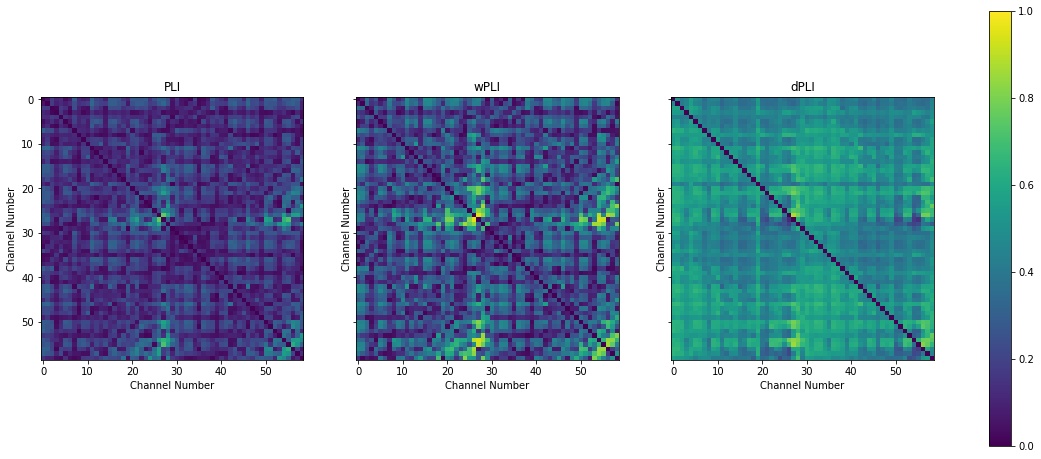

In [285]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
axs[0].imshow(PLI_test, vmin=0, vmax=1)
axs[0].set_title("PLI")
axs[0].set_ylabel("Channel Number")
axs[0].set_xlabel("Channel Number")
axs[1].imshow(wPLI_test, vmin=0, vmax=1)
axs[1].set_title("wPLI")
axs[1].set_ylabel("Channel Number")
axs[1].set_xlabel("Channel Number")
im = axs[2].imshow(dPLI_test, vmin=0, vmax=1)
axs[2].set_title("dPLI")
axs[2].set_ylabel("Channel Number")
axs[2].set_xlabel("Channel Number")

fig.colorbar(im, ax=axs.ravel())
plt.show()

In [299]:
print(epochs.info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, C3, Cz, C4, ...
 chs: 59 EEG
 custom_ref_applied: False
 dig: 62 items (3 Cardinal, 59 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 250.0 Hz
>


Using data from preloaded Raw for 238 events and 501 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


ValueError: x and y must have same first dimension, but have shapes (251,) and (59, 251)

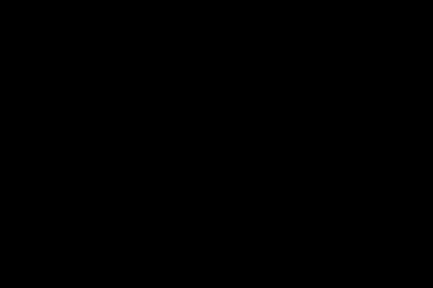

In [307]:
epochs.compute_psd()[0].plot_topo()

In [309]:
prepSignal_EC.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, C3, Cz, C4, ...
 chs: 59 EEG
 custom_ref_applied: False
 dig: 62 items (3 Cardinal, 59 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 250.0 Hz
>

In [313]:
prepSignal_EO.annotations

<Annotations | 242 segments: 3 (233), 32766 (1), 5 (1), boundary (7)>

In [321]:
rawSignal.annotations[3]

OrderedDict([('onset', 6.3752),
             ('duration', 0.0004),
             ('description', 'Stimulus/S  1'),
             ('orig_time',
              datetime.datetime(2013, 11, 11, 13, 47, 40, 346211, tzinfo=datetime.timezone.utc))])

# Annotation splite 0922

In [10]:
annotation_EC_df = prepSignal_EC.annotations.to_data_frame()
annotation_EC_df[annotation_EC_df.columns[0]]

0     1970-01-01 00:00:00.000000
1     1970-01-01 00:00:00.000000
2     1970-01-01 00:00:00.000800
3     1970-01-01 00:00:02.000800
4     1970-01-01 00:00:04.000800
                 ...            
242   1970-01-01 00:07:47.378800
243   1970-01-01 00:07:49.378800
244   1970-01-01 00:07:51.378800
245   1970-01-01 00:07:53.378800
246   1970-01-01 00:07:55.378800
Name: onset, Length: 247, dtype: datetime64[ns]

In [11]:
annotation_EC_df

,onset,duration,description
0,1970-01-01 00:00:00.000000,0.004,32766
1,1970-01-01 00:00:00.000000,0.004,5
2,1970-01-01 00:00:00.000800,0.004,4
3,1970-01-01 00:00:02.000800,0.004,4
4,1970-01-01 00:00:04.000800,0.004,4
...,...,...,...
242,1970-01-01 00:07:47.378800,0.004,4
243,1970-01-01 00:07:49.378800,0.004,4
244,1970-01-01 00:07:51.378800,0.004,4
245,1970-01-01 00:07:53.378800,0.004,4


Text(0.5, 1.0, 'Annotation distribution in Preprocessed Eye Closed data')

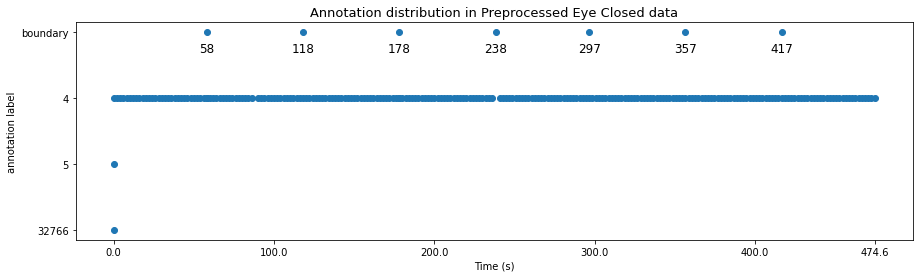

In [15]:
EC_sec = annotation_EC_df[annotation_EC_df.columns[0]].dt.strftime('%s.%f').astype(float) + 32400
point_indices = annotation_EC_df.index[annotation_EC_df['description'] == 'boundary']
plt.figure(figsize = (15,4))
plt.scatter(EC_sec, annotation_EC_df['description'])
for point_index in point_indices:
    point_x = EC_sec[point_index]
    plt.text(point_x, 2.7, f'{point_x:.0f}', fontsize=12, ha='center')
plt.xlabel('Time (s)')
plt.xticks(np.append(np.arange(0, max(EC_sec), 100), max(EC_sec)))
plt.ylabel('annotation label')
plt.title('Annotation distribution in Preprocessed Eye Closed data', fontsize=13)

In [29]:
EC_sec.iloc[-1]

474.6212000000014

In [36]:
# Each trial's breakpoint, 0 to i1, i1+1 to i2, i2+1 to i3 ...
BreakPoint = []
for i, j in enumerate(EC_sec[point_indices]):
    if i == 0:
        BreakPoint.append([0, int(j)])
    else:
        BreakPoint.append([BreakPoint[-1][1], int(j)])
    if i == len(EC_sec[point_indices])-1:
        BreakPoint.append([int(j)+1, int(EC_sec.iloc[-1])])
#     print(BreakPoint)
BreakPoint

[[0, 58],
 [58, 118],
 [118, 178],
 [178, 238],
 [238, 296],
 [296, 356],
 [356, 416],
 [417, 474]]

In [58]:
len(EC_sec[point_indices])

7

In [80]:
epochs = []
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])
for i, d in enumerate(BreakPoint):
    print("The {} trial from {} to {}. ({}sec)".format(ordinal(i+1), d[0], d[1], d[1]-d[0]))
    events = mne.make_fixed_length_events(prepSignal_EC.copy().crop(tmin=d[0], tmax=d[1]), duration=2)
    epochs.append(mne.Epochs(prepSignal_EC, events=events, event_id=None, tmin=0, tmax=2, baseline=None, preload=False))
    print("------------------------------------------------")

The 1st trial from 0 to 58. (58sec)
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
------------------------------------------------
The 2nd trial from 58 to 118. (60sec)
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
------------------------------------------------
The 3rd trial from 118 to 178. (60sec)
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
------------------------------------------------
The 4th trial from 178 to 238. (60sec)
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
------------------------------------------------
The 5th trial from 238 to 296. (58sec)
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
------------------------------------------------
The 6th trial from 296 to 356. (60

In [83]:
CauConn(0, epochs[0])

Using data from preloaded Raw for 29 events and 501 original time points ...
0 bad epochs dropped
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58])
Using data from preloaded Raw for 29 events and 501 original time points ...
Connectivity computation...
    computing connectivity for 58 connections
    using t=0.000s..2.000s for estimation (501 points)
    frequencies: 9.5Hz..11.0Hz (4 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    comput

array([[0.25862069, 0.18965517, 0.32758621, 0.20689655, 0.25862069,
        0.10344828, 0.32758621, 0.17241379, 0.22413793, 0.03448276,
        0.46551724, 0.18965517, 0.03448276, 0.13793103, 0.44827586,
        0.43103448, 0.17241379, 0.15517241, 0.06896552, 0.5       ,
        0.51724138, 0.4137931 , 0.10344828, 0.10344828, 0.48275862,
        0.46551724, 0.37931034, 0.24137931, 0.06896552, 0.17241379,
        0.29310345, 0.03448276, 0.25862069, 0.44827586, 0.24137931,
        0.20689655, 0.15517241, 0.22413793, 0.36206897, 0.17241379,
        0.13793103, 0.39655172, 0.34482759, 0.18965517, 0.10344828,
        0.46551724, 0.29310345, 0.10344828, 0.18965517, 0.5       ,
        0.56896552, 0.24137931, 0.10344828, 0.46551724, 0.5       ,
        0.44827586, 0.31034483, 0.18965517],
       [0.29722836, 0.34122844, 0.33745882, 0.09686102, 0.06205837,
        0.15709922, 0.32478544, 0.20838313, 0.09482269, 0.12279782,
        0.34989713, 0.34416054, 0.07741561, 0.23094546, 0.44912667,
   

In [82]:
epochs[0]

Number of events,29
Events,1: 29
Time range,0.000 – 2.000 s
Baseline,off
